# Fifa man of the match model
Match statistics with which team player has won Man of the match

In [233]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
Author_last_changes= "Tiba R."

In [205]:
data = pd.read_csv('FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary

In [232]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


Let's now take a look at our dataset attributes and understand their meaning and significance.


| Attribute Name | Description |
|-----------------------|----------------------------|
|Date | Match Date |
|Team | Playing Team |
|Opponent | Opponent Team|
|Goal Scored | Number of goals scored by this team|
|Ball Possession % | Amount of time ball was in control by the team|
|Attempts | Number of attempts to score goal|
|On-Target | Number of shots on-target|
|Off-Target | Number of shots that went off-target|
|Blocked | Number of opponent team's attempts blocked by the team|
|Corners | Number of corner shots used|
|Offsides | Number of off-side events|
|Free Kicks | Number of free-kicks used|
|Saves | Number saves by the goal keeper|
|Pass Accuracy % | Percentage of passes that reached the same team player as aimed|
|Passes | Total number of passes by the team|
|Distance Covered (Kms) | Total distance covered by the team members in this game|
|Fouls Committed | Number of fouls committed by the team members|
|Yellow Card | Number of Yellow warning received|
|Yellow & Red | Number of Yellow & Red warning received|
|Red | Number of Red cards received|
|Man of the Match | Did this team member win Man of the Match?|
|1st Goal | When did the team score the 1st goal?|
|Round | Stage of the match|
|PSO | Was there a penalty shootout (PSO) in this match?|
|Goals in PSO | Number of goals scored in the Penalty shootout|
|Own goals | Number of own goals|
|Own goal Time | When did the team score own goal?|

## Pre-processing

In [207]:
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
print(X)

     Goal Scored  Ball Possession %  Attempts  On-Target  Off-Target  Blocked  \
0              5                 40        13          7           3        3   
1              0                 60         6          0           3        3   
2              0                 43         8          3           3        2   
3              1                 57        14          4           6        4   
4              0                 64        13          3           6        4   
5              1                 36         8          2           5        1   
6              3                 39         8          3           2        3   
7              3                 61        12          5           5        2   
8              2                 51        12          5           4        3   
9              1                 49         4          1           2        1   
10             1                 72        26          7           9       10   
11             1            

[128 rows x 18 columns]


In [214]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
rf = RandomForestClassifier(random_state=0).fit(train_X, train_y)
rf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## ELI5

In [209]:
import eli5
from eli5.sklearn import PermutationImportance

In [210]:
perm = PermutationImportance(rf, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.0750 ± 0.1159,Goal Scored
0.0625 ± 0.0791,Corners
0.0437 ± 0.0500,Distance Covered (Kms)
0.0375 ± 0.0729,On-Target
0.0375 ± 0.0468,Free Kicks
0.0187 ± 0.0306,Blocked
0.0125 ± 0.0750,Pass Accuracy %
0.0125 ± 0.0500,Yellow Card
0.0063 ± 0.0468,Saves
0.0063 ± 0.0250,Offsides


## Visualizing the tree

In [224]:
import graphviz
from sklearn.externals.six import StringIO
#import pydot
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

In [229]:
# Extract single tree
estimator = rf.estimators_[6]

In [230]:
#import pydot
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data, feature_names=feature_names, filled=True, rounded=True, impurity= False)

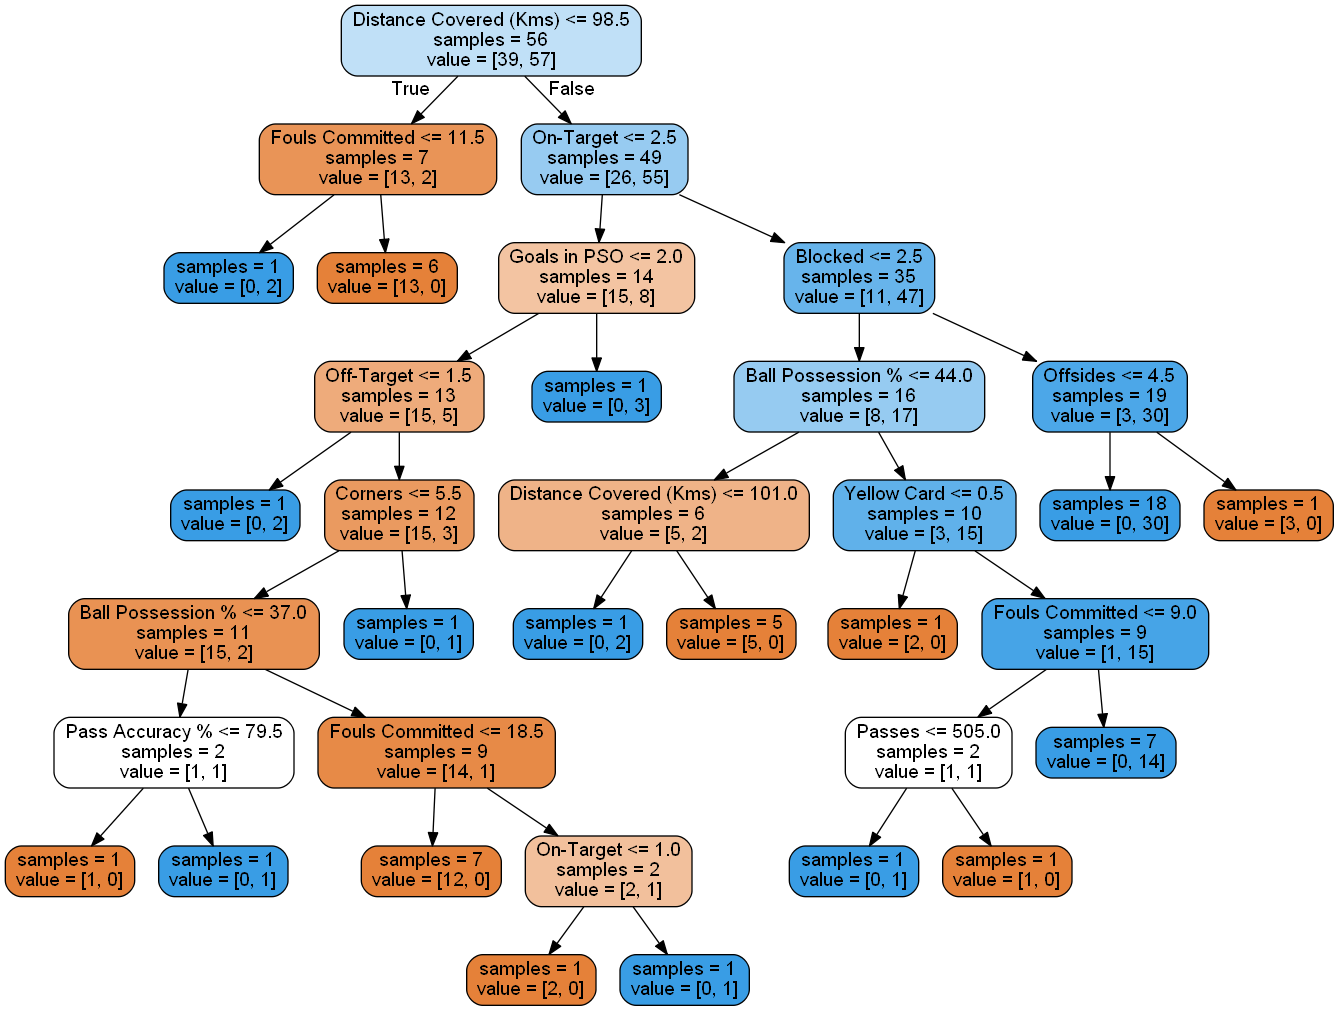

In [231]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## SHAP

In [122]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show] 
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


rf.predict_proba(data_for_prediction_array)

array([[0.3, 0.7]])

In [156]:
data_for_prediction.values

array([  2,  38,  13,   7,   4,   2,   6,   1,  18,   1,  69, 399, 148,
        25,   1,   0,   0,   3], dtype=int64)

In [123]:
data_for_prediction_array

array([[  2,  38,  13,   7,   4,   2,   6,   1,  18,   1,  69, 399, 148,
         25,   1,   0,   0,   3]], dtype=int64)

In [124]:
import shap 


In [201]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [202]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [203]:
# use Kernel SHAP to explain test set predictions
k_explainer = shap.KernelExplainer(rf.predict_proba, train_X)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_prediction)

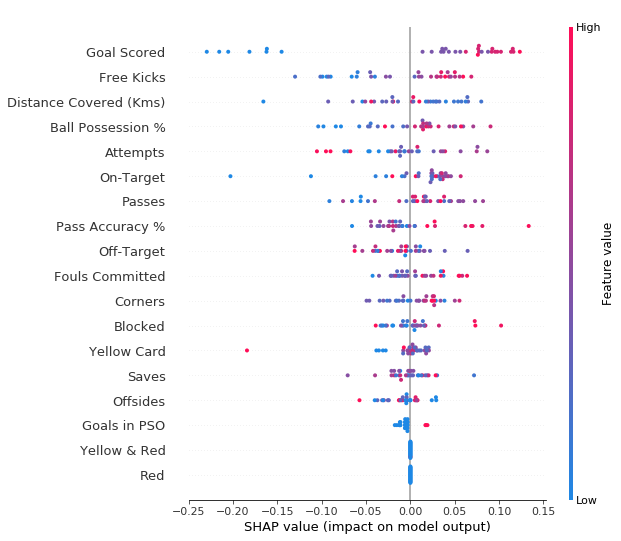

In [128]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_X)

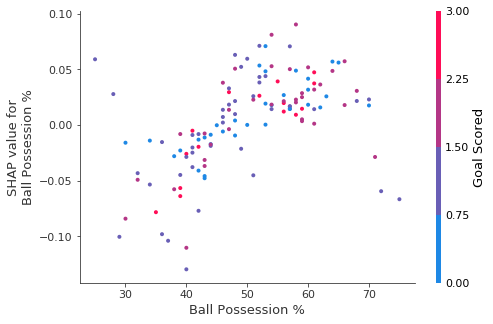

In [129]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot('Ball Possession %', shap_values[1], X, interaction_index="Goal Scored")

## LIME

In [130]:
import lime
from lime.lime_tabular import LimeTabularExplainer

In [143]:
out_names=['Man of the Match']# ["False", "True"]
val_y[118]

False

In [152]:
explainer = LimeTabularExplainer(train_X.values, feature_names=feature_names, class_names= ["False", "True"] , verbose=True)

In [153]:
exp = explainer.explain_instance(val_X.iloc[row_to_show].values, rf.predict_proba, num_features=len(data.columns))

Intercept 0.44664046756914344
Prediction_local [0.74212545]
Right: 0.7


In [154]:
exp.show_in_notebook(show_table=True)

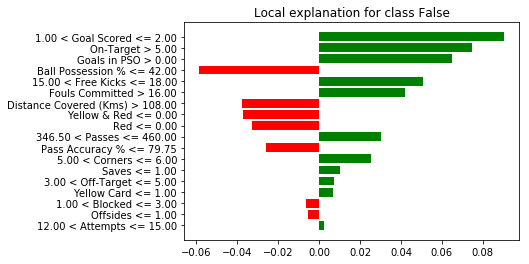

In [135]:
fig = exp.as_pyplot_figure()

### References:
- Kaggle : https://www.kaggle.com/mathan/fifa-2018-match-statistics/home